In [22]:
import pandas as pd
import numpy as np
#import os


In [45]:
#print(os.getcwd())
#os.chdir("C:/Users/Jitender Singh/Desktop/DAProject/Bank_Customer_Churn.csv")

In [46]:
from google.colab import files

# This will open a file picker for you to choose your SQLite file
uploaded = files.upload()

Saving Bank_Customer_Churn.csv to Bank_Customer_Churn (2).csv


In [47]:
!ls -lh

total 648K
-rw-r--r-- 1 root root 644K Aug 19 18:24 'Bank_Customer_Churn (2).csv'
drwxr-xr-x 1 root root 4.0K Aug 18 13:38  sample_data


In [54]:
pwd

'/content'

In [56]:
# Show files and sizes so we know which DB is in /content
import os, glob
for p in glob.glob("/content/Bank_Customer_Churn (2).csv"):
    print(p, os.path.getsize(p))

/content/Bank_Customer_Churn (2).csv 658944


In [58]:
df=pd.read_csv('Bank_Customer_Churn (2).csv')

In [59]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,IsActiveMember,HasCrCard,Exited,Unnamed: 13
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,1,1,1,NaN
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,1,1,0,NaN
2,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,0,0,1,NaN
3,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,0,0,0,NaN
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,1,1,0,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  HasCrCard        10000 non-null  int64  
 12  Exited           10000 non-null  int64  
 13  Unnamed: 13      0 non-null      float64
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [75]:
#Now we will drop some unnecessary columns
df_cleaned= df.drop(columns=['Unnamed: 13','CustomerId', 'Surname' ])

In [76]:
df_cleaned.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,IsActiveMember,HasCrCard,Exited
0,619,France,Female,42.0,2,101348.88,0.00,1,1,1,1
1,608,Spain,Female,41.0,1,112542.58,83807.86,1,1,1,0
2,502,France,Female,42.0,8,113931.57,159660.80,3,0,0,1
3,699,France,Female,39.0,1,93826.63,0.00,2,0,0,0
4,850,Spain,Female,43.0,2,79084.10,125510.82,1,1,1,0


In [77]:
#Now we will be converting Geography and Gender into Numerical Values
df_cleaned = pd.get_dummies(df_cleaned, columns=['Geography', 'Gender'], drop_first=True)

In [78]:
df_cleaned.columns

Index(['CreditScore', 'Age', 'Tenure', 'EstimatedSalary', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'HasCrCard', 'Exited',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [79]:
#Now check if any column has null values
df_cleaned.isnull().sum()

,0
CreditScore,0
Age,3
Tenure,0
EstimatedSalary,0
Balance,0
NumOfProducts,0
IsActiveMember,0
HasCrCard,0
Exited,0
Geography_Germany,0


* There are no missing values in the dataset

In [80]:
df_cleaned.describe()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,IsActiveMember,HasCrCard,Exited
count,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.922077,5.012800,99762.195289,76485.889288,1.530200,0.515100,0.515100,0.203700
std,96.653299,10.489072,2.892174,60583.863580,62397.405202,0.581654,0.499797,0.499797,0.402769
min,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,1.000000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,1.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,1.000000,1.000000


 ### Key Findings from Customer Data
 1. Credit Score

   * Scores range between 350 and 850.

  *  The average is around 650, suggesting most customers fall into a moderate credit risk group.


2. Age

   * Customers range from 18 to 92 years old.

   * The average age is 39, with a concentration in the 30–40 age group.

3. Tenure (Customer Years)

   * Tenure spans 0 to 10 years.

   * The median is 5 years, meaning half of customers stay at least this long.

4. Balance

   * Balances range widely, from $0 (likely non-savings users) up to $250,898.

   * This highlights significant variation in customer wealth profiles.

5. Number of Products

  * Customers hold between 1 and 4 products.

  * Most have 1 or 2 products (median = 1).

6. Credit Card Ownership

  * About 70% of customers have a credit card.

7. Active Membership

  * Around 51% are active members, leaving nearly half considered inactive.

8. Estimated Salary

  * Salaries range from $11 to $199,992.

  * The median salary is about $100,000, suggesting a fairly even income distribution.

9. Churn Rate(Exited Customers)

  * 20% of customers have exited, while 80% remain, indicating retention is strong but churn is still a significant factor.
---

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

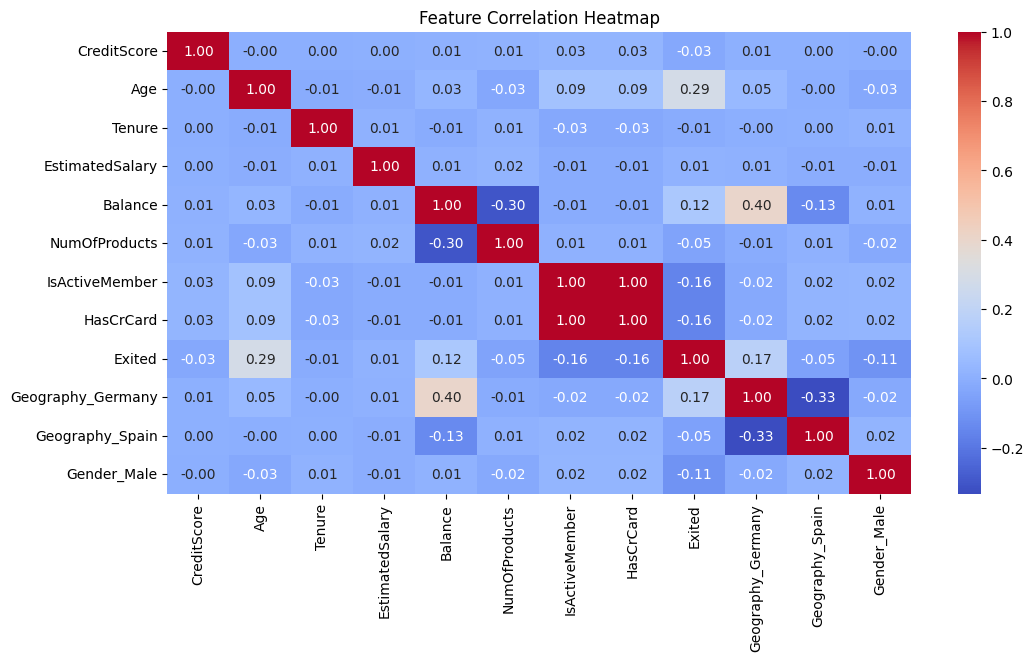

In [82]:
plt.figure(figsize=(12,6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt= ".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### Insights on Age and Customer Churn
1. Correlation Between Age and Churn

  * There’s a moderate positive relationship (+0.29) between age and churn.

  * In simple terms: the older the customer, the more likely they are to leave. Younger customers tend to stay with the bank longer.

2. Average Age Difference

  * Customers who churned are, on average, older than those who stayed.

  * This shows that churn is not evenly spread across all ages — it becomes more common as customers get older.

3. Age Distribution Patterns

  * When looking at charts like boxplots and density curves, a clear pattern emerges:

  * Churned customers cluster more in the higher age brackets.

  * Retained customers are spread more evenly across younger and middle-age groups.

4. Why Might Older Customers Leave?

  * They may be seeking services that better match retirement or lifestyle needs.

  * Competitors could be offering tailored benefits (like higher interest rates, senior perks, or specialized financial advice).

5. Business Takeaway

  * To reduce churn, banks should design offerings that appeal to older customers — e.g., retirement-focused products, loyalty rewards, or senior advisory services.

  * Personalized outreach and proactive engagement could help keep this segment loyal.
---


In [ ]:
# Balance Vs Churn

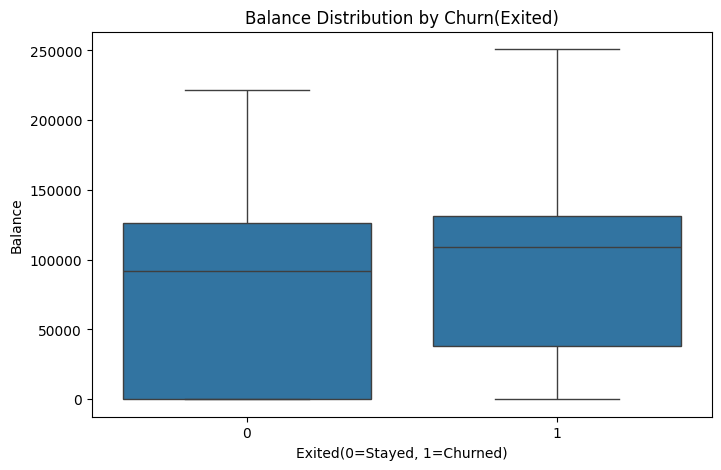

In [84]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Exited', y='Balance', data=df_cleaned)
plt.title('Balance Distribution by Churn(Exited)')
plt.xlabel('Exited(0=Stayed, 1=Churned)')
plt.ylabel('Balance')
plt.show()

### Insights on Balance and Customer Churn
1. Balance Patterns

  * A surprising finding: many customers who stayed with the bank had a zero balance in their accounts.

  * On the other hand, customers who left usually had higher balances.

  * In other words, having no balance doesn’t automatically mean churn — in fact, zero-balance customers were less likely to leave.

2. Balance vs. Churn Relationship

  * Customers with larger balances were a little more likely to churn.

  * This could mean that high-balance customers have higher expectations, and if the bank doesn’t meet them, they may choose to switch to a competitor.

3. Business Takeaways

  * High-balance customers are valuable and should feel valued:

  * Offer premium services (like dedicated account managers).

  * Create loyalty programs that reward their commitment.

  * Zero-balance customers shouldn’t be ignored either. Banks could engage them with targeted campaigns or new services to encourage more activity and usage.
---




In [ ]:
#Active Membership Vs Churn

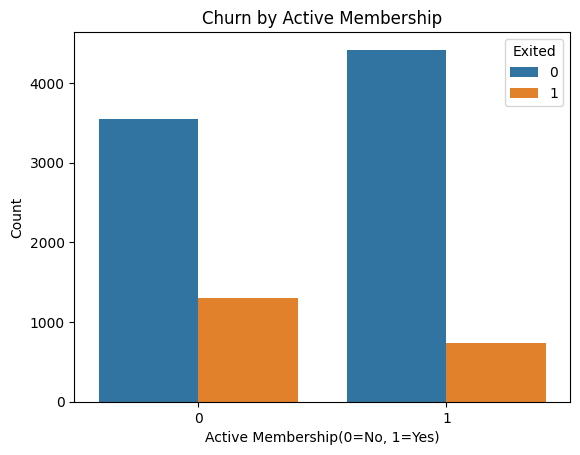

In [85]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df_cleaned)
plt.title('Churn by Active Membership')
plt.xlabel('Active Membership(0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()

### Insights on Active Membership and Customer Churn
1. Churn by Membership Status

  * **Inactive Members (IsActiveMember = 0)**: A large share of churn comes from customers who aren’t actively engaged with the bank. They are much more likely to leave compared to active members.

  *  **Active Members (IsActiveMember = 1)**: Customers who stay engaged — whether through regular transactions or account activity — show a much lower churn rate, proving that engagement plays a big role in retention.

2. What This Tells Us

  *  Staying active with the bank clearly helps build loyalty.

  *  Customers who aren’t engaged are at higher risk of leaving, which makes them an important group to focus on.

3. Business Takeaways

  *  Boost engagement with personalized communication and relationship-building efforts.

  *  Reward activity with loyalty perks or exclusive benefits for active members.

  *  Proactively reach out to inactive members, understand their concerns, and provide solutions before they decide to leave.
  ---


In [86]:
#Churn Rate by Geography

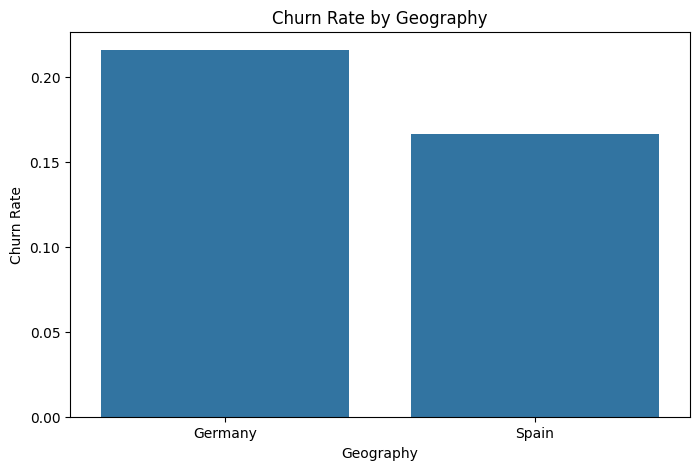

In [87]:
df_cleaned['Geography'] = df_cleaned[['Geography_Germany', 'Geography_Spain']].idxmax(axis=1).map({
    'Geography_Germany': 'Germany',
    'Geography_Spain': 'Spain'
}).fillna('France')  # Customers not marked as Germany or Spain are from France

# Bar plot for churn by geography
geography_churn = df_cleaned.groupby('Geography')['Exited'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=geography_churn.index, y=geography_churn.values)
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.show()


### Insights on Geography and Churn
**Churn Rates by Geography**:

* **Germany:**
Has the highest churn rate, indicating a significant number of customers are leaving.
* **Spain:**
Has the lowest churn rate, showing strong customer loyalty.
* **France:**
Not explicitly shown in the chart, but inferred to have a moderate churn rate, between Spain and Germany.

**Key Observations**:

* Customers in Germany are more likely to churn, potentially due to dissatisfaction or unmet expectations.
* Customers in France have a moderate churn rate, reflecting average satisfaction.
* Spanish customers exhibit the highest loyalty.

**Business Recommendations**:

**For Germany:**
* Conduct surveys to identify customer dissatisfaction.
* Offer loyalty incentives tailored to German customers.

**For France:**
* Focus on proactive retention strategies targeting moderate-risk customers.
* Improve engagement through personalized services.

**For Spain:**
* Maintain current strategies that promote high loyalty.
* Use Spain's customer retention strategies as a benchmark for other regions.